# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [2]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Read in the data set
df = pd.read_csv("boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Clean and pre-process the data if neccessary

# Find whether there are missing values

print("Missing value distribution:")
print(df.isnull().mean())

# This shows that there are no missing values


# Check data types of each column to make sure there are no strings

print("\nColumn data types: ")
df.dtypes

# This shows that there are no strings, only numbers (float and int)
# Therefore no need to check for unique values (e.g. spelling mistakes or different ways of saying the 
# same thing.)


# There are no dates so no need to change to correct format

Missing value distribution:
crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

Column data types: 


crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

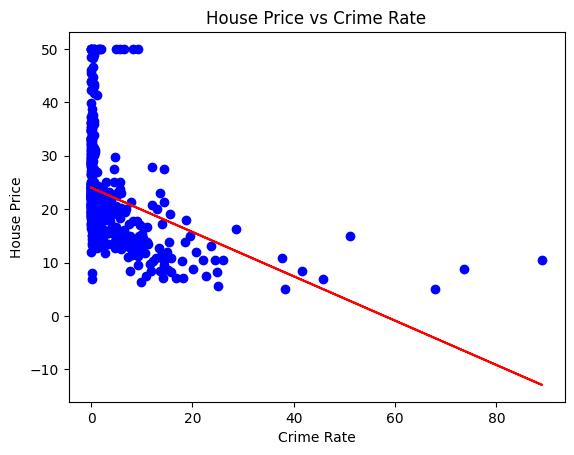

Coefficient: 
 [[-0.41519028]]


In [5]:
# Explore the data with visualisations such as histograms and correlation matrices
# House Price v Crime Rate
# Select and reshape data
x = df.iloc[:,0].values
y = df.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

In [6]:
# Split the independent variables from the dependent variable
# Split the independent variables from the dependent variable
X = df.iloc[:, :-1]    # Independent variables(features)
y = df.iloc[:, -1]    # Dependent variables(target)

print("Indepent variables(features):")
print(X.head())

print("\nDependent variable(target):")
print(y.head())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print("\nTraining set shape:",X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Indepent variables(features):
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  

Dependent variable(target):
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

Training set shape: (404, 13) (404,)
Test set shape: (102, 13) (102,)



Correlation Matrix:
             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b      

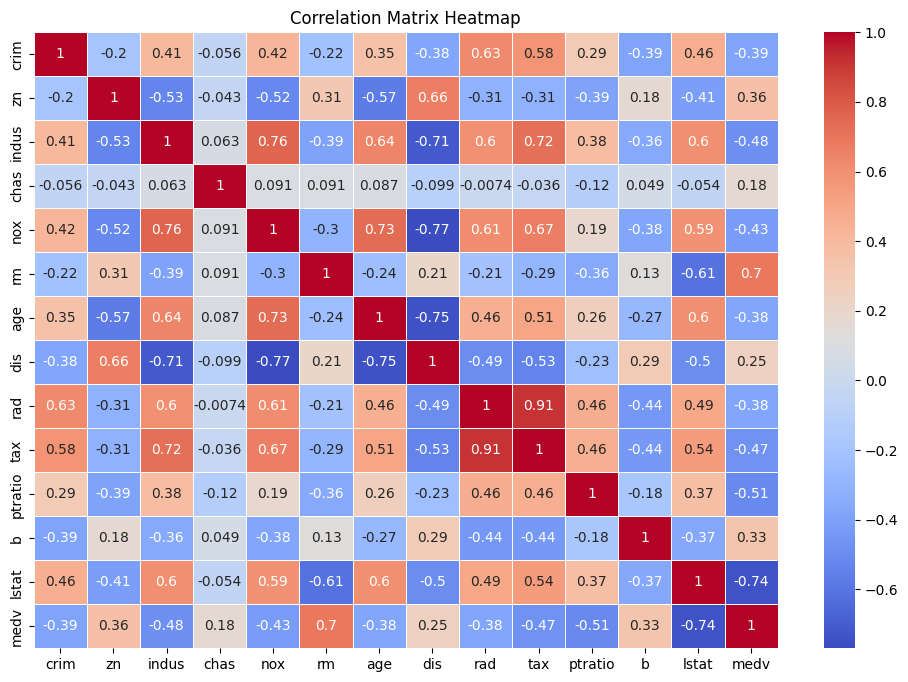

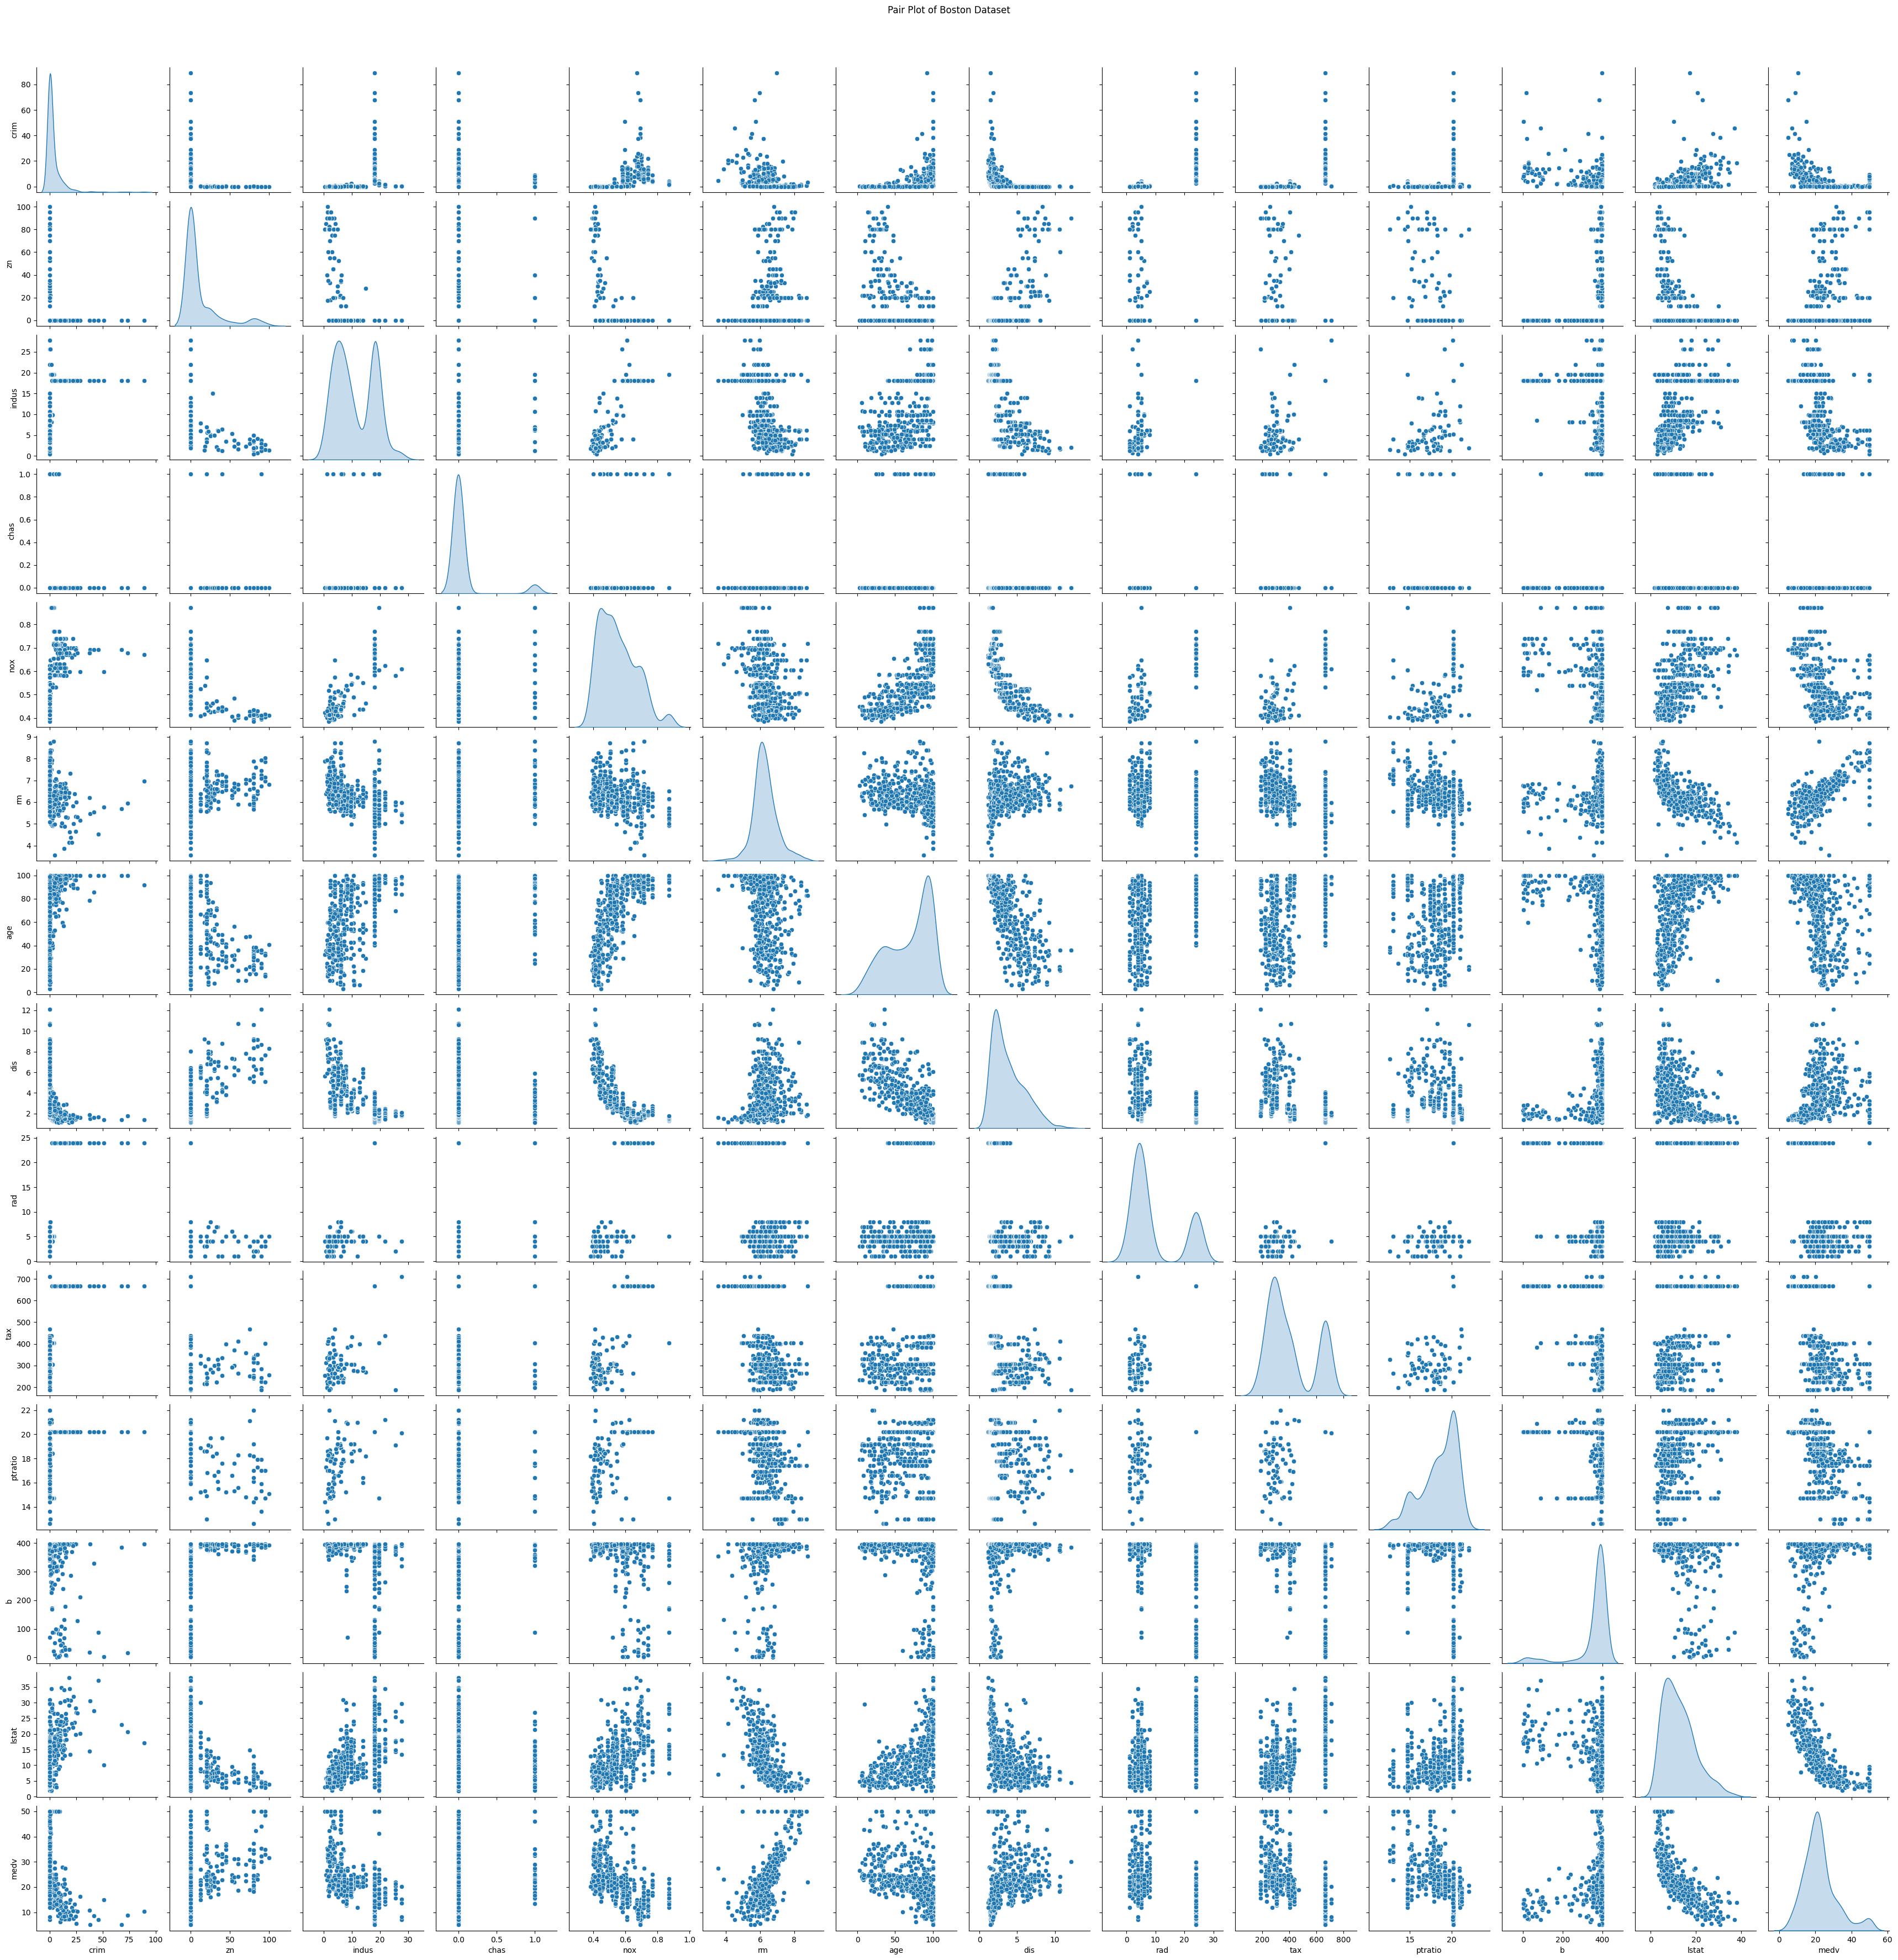

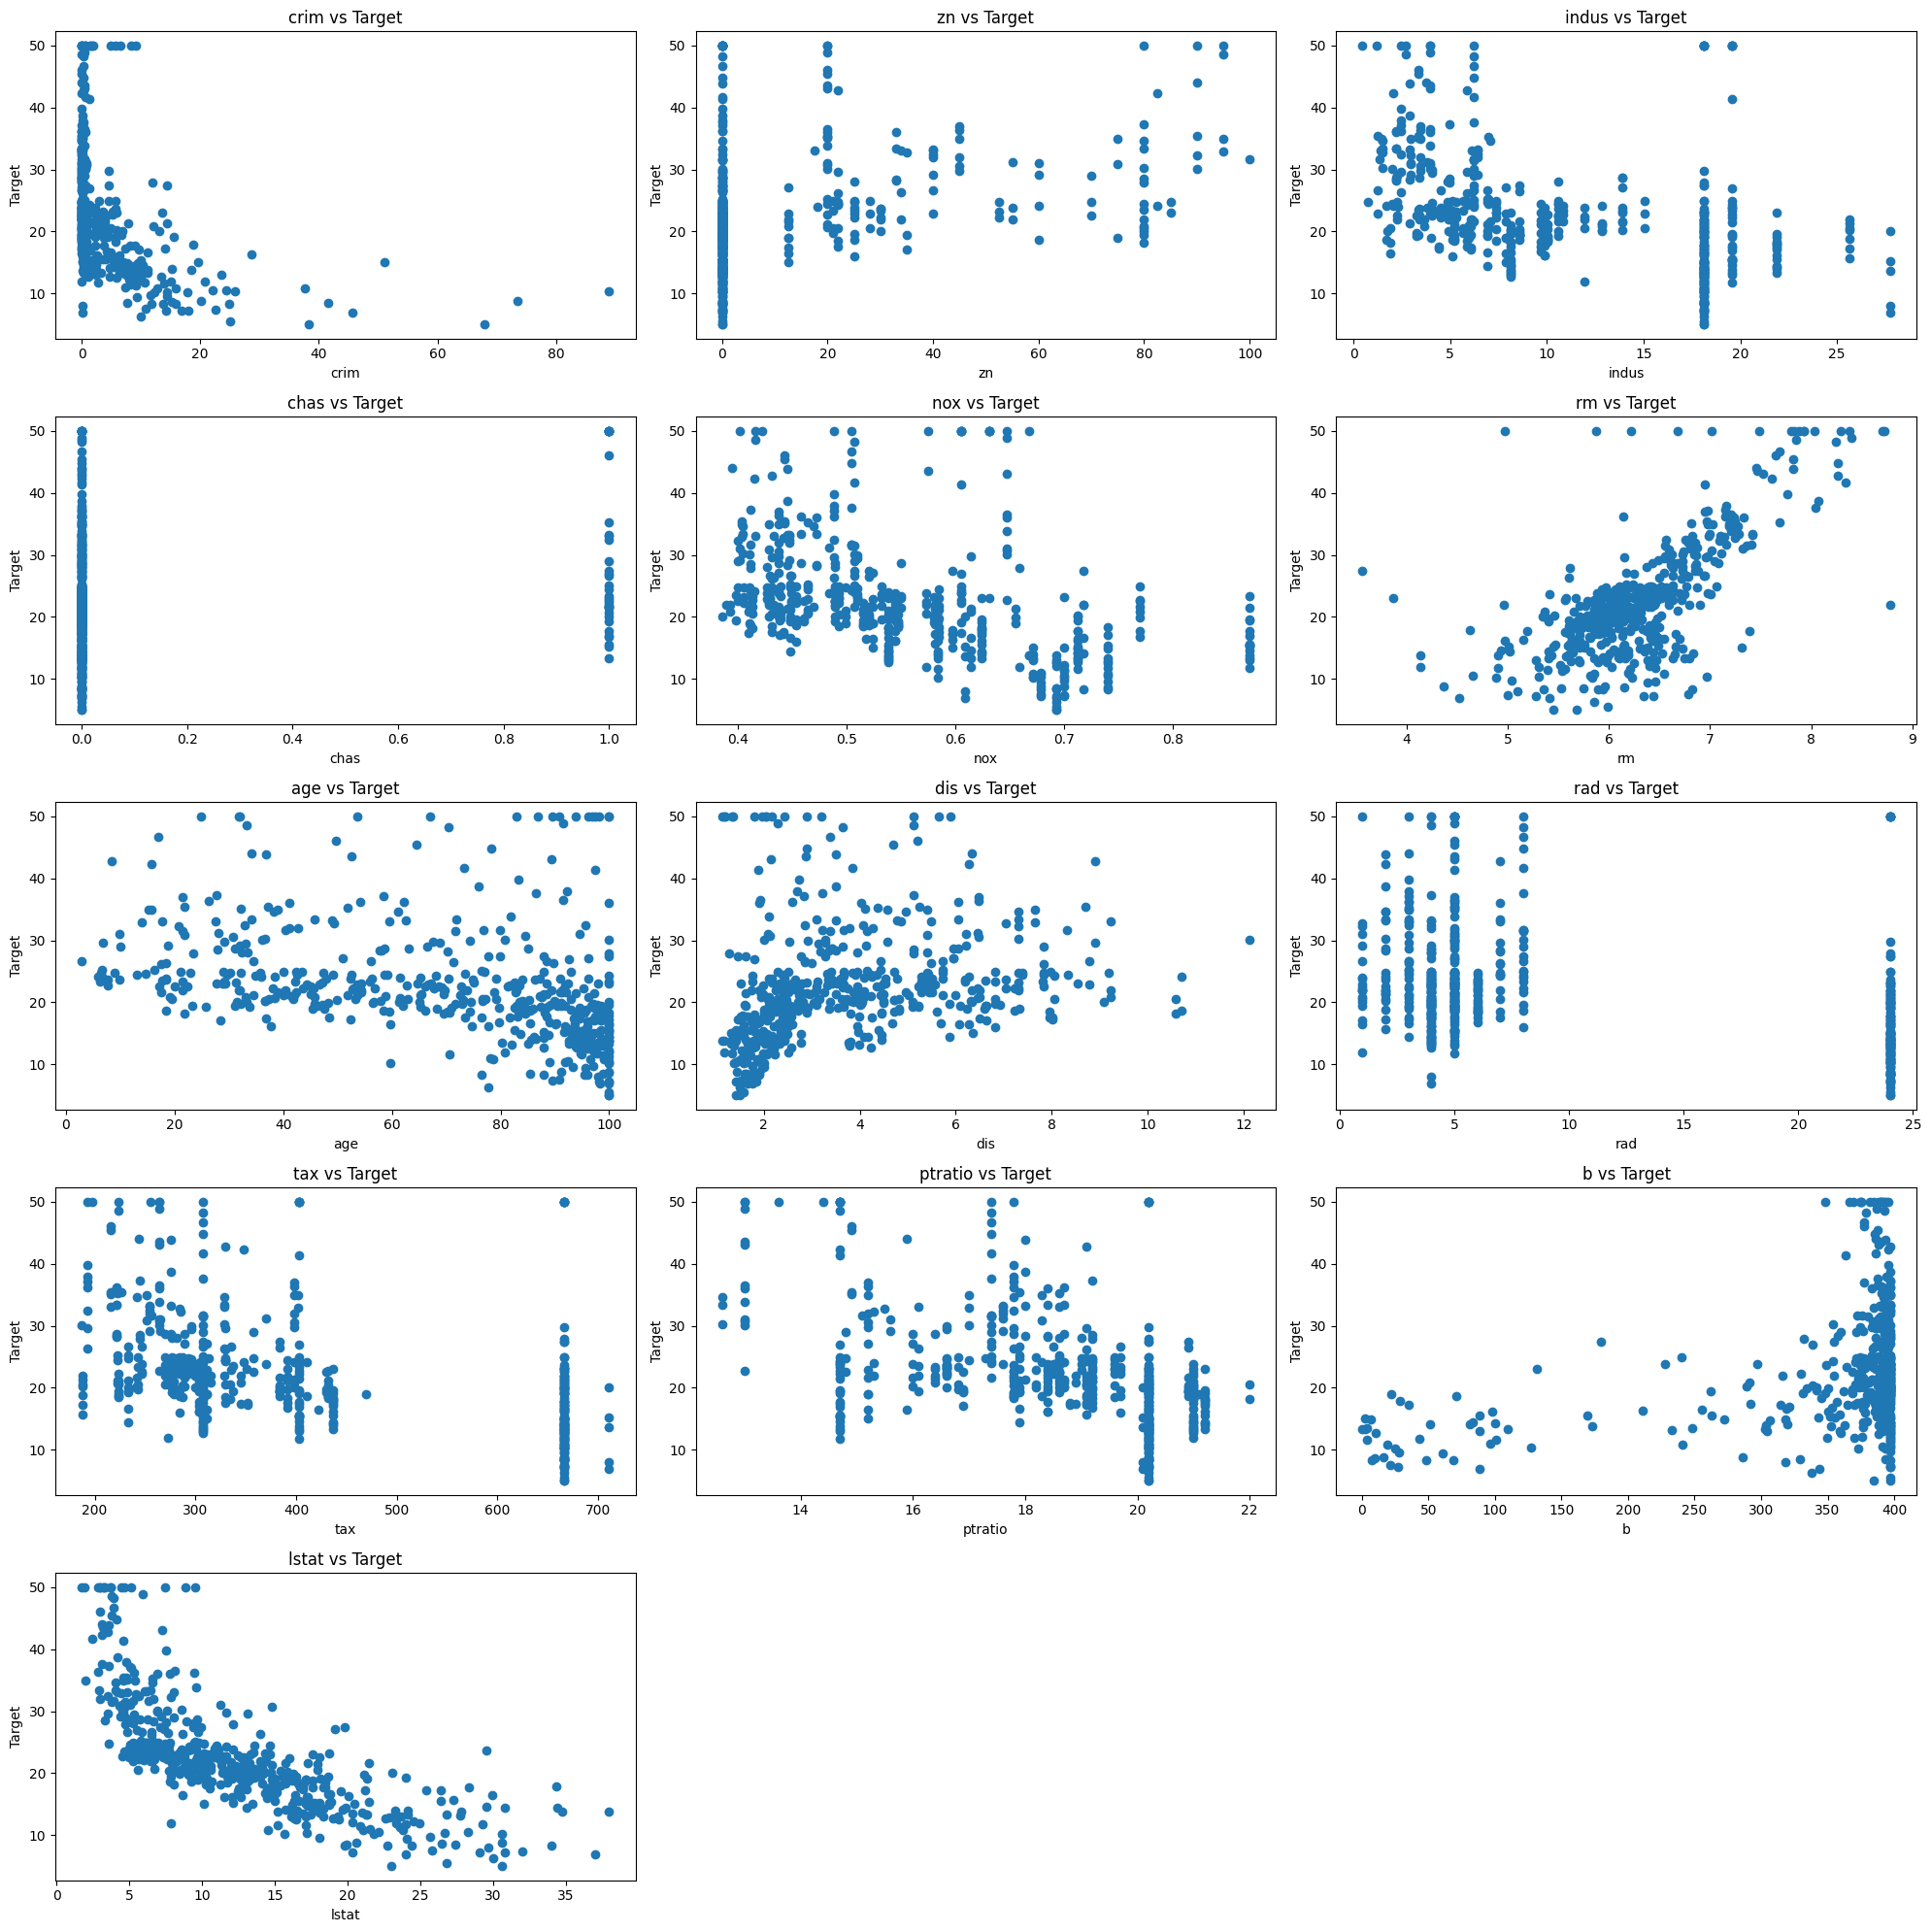

In [7]:
# Explore relationships between the independent and dependent variables
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pair plots
boston_data_combined = pd.concat([X, y], axis=1)
sns.pairplot(boston_data_combined, diag_kind='kde')
plt.suptitle('Pair Plot of Boston Dataset', y=1.02)
plt.show()

# Scatter Plots
plt.figure(figsize=(20, 20))
for i, col in enumerate(X.columns):
    plt.subplot(5, 3, i + 1)
# Adjust based on the number of columns
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.title(f'{col} vs Target')

plt.tight_layout()
plt.show()

In [8]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display shapes
print("\nTraining set shape:",X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (379, 13) (379,)
Test set shape: (127, 13) (127,)


In [9]:
# Build a multiple linear regression model using 'rm' and 'lstat'
X = df[['rm', 'lstat']]
y = df['medv']          # Assuming 'MEDV' is target variable column name

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the Feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make Predictions and Evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 29.545664673377924
R-squared: 0.5780826814921924


In [10]:
# Print the model intercept and coefficients
print(f'Intercept:{model.intercept_}')
print(f'Coefficients:{model.coef_}')

Intercept:22.907915567282323
Coefficients:[ 3.79214796 -4.63014079]


In [11]:
# Generate predictions for the test set

# Make Predictions and Evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'model.predict:{y_pred}')
print(f'Mean Squared Error: {mse}')


model.predict:[25.64861998 31.02604952 17.50812413 26.08093021 19.6828203  23.02568254
 16.97562726 14.56510235 22.1782484  20.16605016 17.43667726 18.24803999
 -2.47758553 22.53784601 20.16386984 26.92327611 17.27754341  3.55137694
 37.2794553  18.53439304 26.30969852 27.19663121 13.14603023 26.17333529
 19.16667921 14.53081816 22.75162525 21.02153283 17.90575061 19.08658035
 17.53323285 26.89484542 27.52467784 19.34472978 15.50551562 17.54216028
 32.95338869 22.27121283 20.14710826 25.71985871 12.38979647 28.91136019
 38.17627211 18.68706368 25.80307986 16.70705131 15.83946209 27.15873269
 19.63296877 29.12052853 20.75868848 31.44586634 17.92494902 28.46197305
 35.02056659 24.1013047  19.71258405 31.69891705 25.1300336  15.26188437
 27.17477515 32.78493631 29.79058286 18.86745436 28.81081611 10.88238554
 20.69765342 26.55231425 29.6540935  16.86149224 19.01196283 28.25309909
 13.11767308 25.36825503 23.39539133  6.59238186 22.20157414 36.61858914
 18.51926514 10.68070861 23.01070818 

In [12]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.5780826814921924


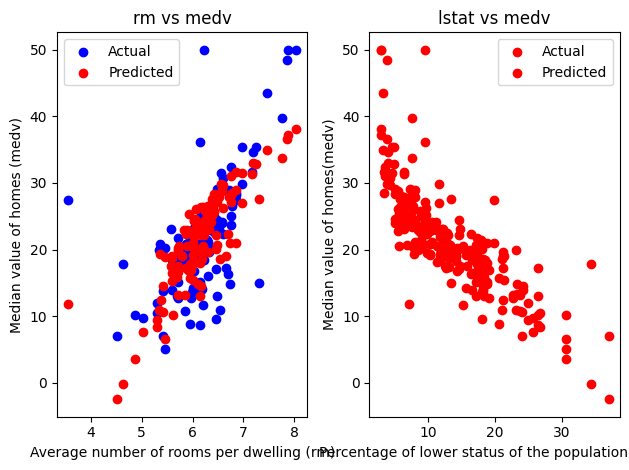

In [13]:
# Generate a plot

# Visualize the Results
# Plot for 'rm' vs 'medv'
plt.subplot(1, 2, 1)
plt.scatter(X_test['rm'], y_test, color='blue', label='Actual')
plt.scatter(X_test['rm'], y_pred, color='red', label='Predicted')
plt.xlabel('Average number of rooms per dwelling (rm)')
plt.ylabel(f'Median value of homes (medv)')
plt.title(f'rm vs medv')
plt.legend()

# Plot for 'lstat' vs medv
plt.subplot(1, 2, 2)
plt.scatter(X_test['lstat'], y_test, color='red', label='Actual')
plt.scatter(X_test['lstat'], y_pred, color='red', label='Predicted')
plt.xlabel('Percentage of lower status of the population(lstat)')
plt.ylabel(f'Median value of homes(medv)')
plt.title(f'lstat vs medv')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Print the coefficients
print(f'Coefficients:{model.coef_}')

Coefficients:[ 3.79214796 -4.63014079]


**Interpret coefficients in the context of the prediction:**
[Answer here]

Intercept: This expected value of MEDV when all indepentvariabless are zero. In practical terms, it may not always have meaningful interpretation, espicially if zero values for features are within the scope of the data.

Coefficient for rm: This value indicates how much the MEDV is expected to change with a one-unit increase in rm, assuming all other variables are held constant. A positive coeffient suggests that an increase in the average number of rooms per dwelling is associated with an increase in the median value of homes.

Coefficient for lstat: This value indicates how much the MEDV is expected to change with a one-unit increas in lstat, assuming all other variables are held constant. A negative coefficient suggests that an increase in the percentage of lower status of the population is associated with a decrease in the median value of homes.

Intercept(22.53): When rm and lstat are both zero, the predicted MEDV is 22.53
Coefficient for rm(4.12): For each additional room, the MEDv increases by approximately 4.12 units, assuming lstat is constant.
Coefficient for lstat(-3.31): For each percentage increase in lower status of the population, the MEDV decreases by approximately 3.31 units, assuming rm is constant.

The coefficients provide a clear understanding of how each feature impacts the target variable.By examing these values , we can interpret the models behavior and the relationship between independent variables(rm, lstat) and the dependent variable (MEDV)

**Summarise findings**
[Answer here]

Postive Impact of rm: More rooms in dwelling positively impact the median value of homes. This suggests that larger homes are valuedhigher in the Boston housing market.

Negative Impact of lstat: A higher percentage of lower status population negatively impacts the median value of homes. This suggests that socioeconomic factors play a significant role in determining home values.

Model Performance: The model, evaluated using MSE and R-squared, demonstrated a reasonable flit, explaining a significant portion of the variance in home values with these two features.

The multiple linear regression model effectively captured the relationships between the number of rooms, the percentage of lower status population, and the median value of homes in the Boston housing market. These findings highlight the importance of both physical attributes of homes and socioeconomic factors in determining  property values. Future models could be enhanced by incorporating additional features and exploring non-linear relationships to further improve predictive accurancy. 